# Lecture 13

## Recurrent Neural Networks - Contextualized Word Representations (ELMo)

### Sequence Modeling with Neural Networks
* Many NLP tasks require models of sequences (language models, text classification, sentiment analysis, POS tagging, machine translation)
    * Cannot use bag-of-words or one-hot vector representation, because sequence (order) is important
* Recurrent Neural Networks take the **entire** history into account

### Basic Recurrent Neural Network (RNN)
* Basic idea: hidden layer represents a state, state representation is fed back into the function R
* Weights are shared across all time steps
* The output at step *i* depends on all previous steps
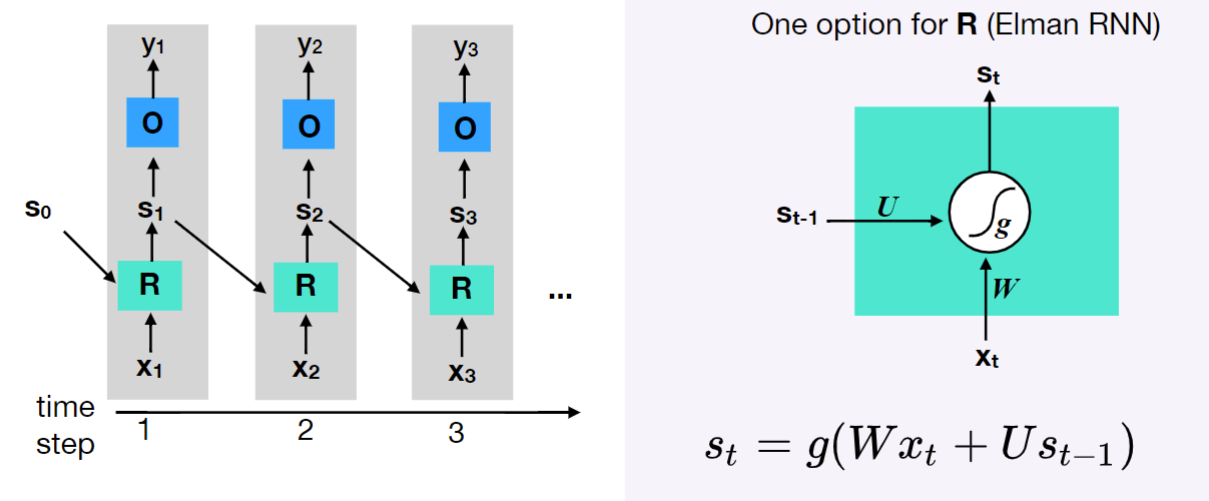


* Apply the RNN to an input sequence
* Ignore all outputs except for $y_n$
* Feed $y_n$ into a feed forward neural network to predict

### Backpropagation Through Time (BTT)
* During the forward pass, create copies of the RNN unit for each time step, but share the same weight vector
* Forward pass: apply RNN to sequence of words, then take the output and feed this output ($y_n$) into a feed forward neural network to predict an outcome, then backpropagate the loss through the sequence of RNNs
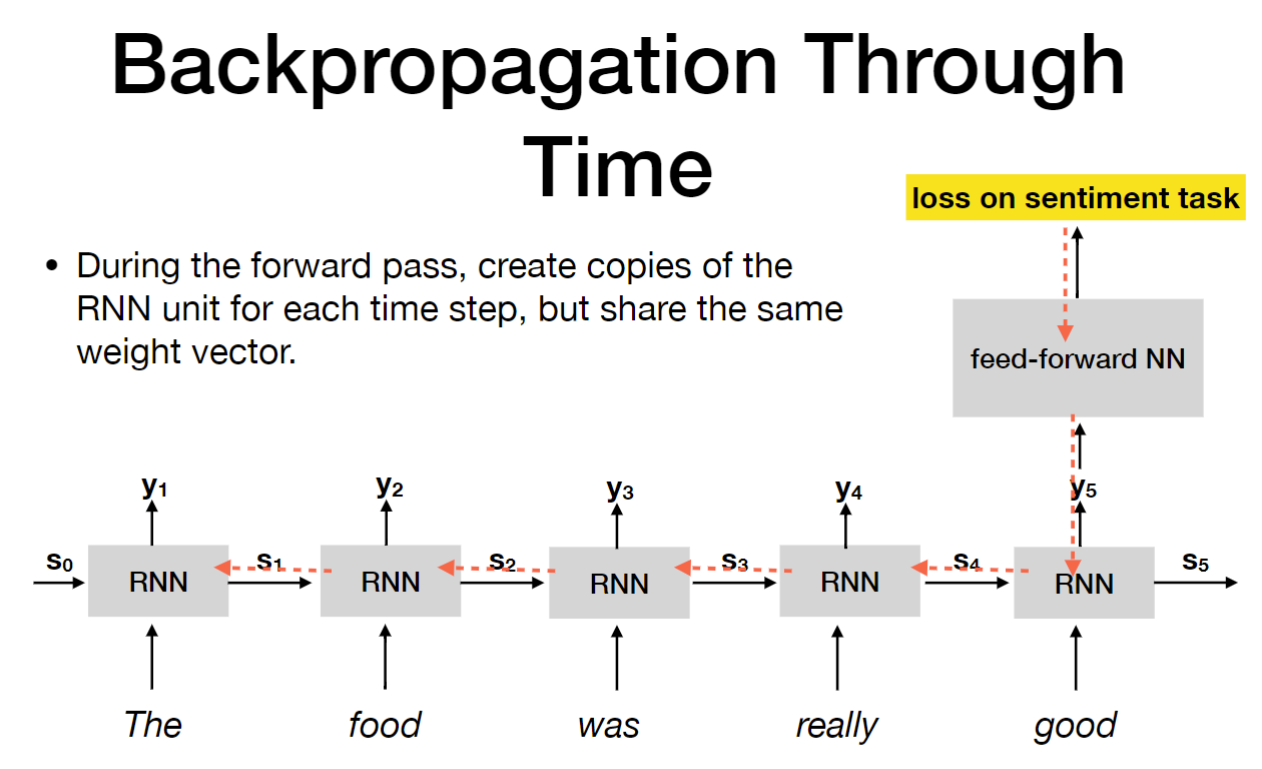

### Vanishing Gradient Problem
* The function computed by the network looks like this:
$$
\begin{align}
s_3 &= R(s_2, x_3) \\
    &= R(R(s_1, x_2), x_3) \\
    &= R(R(R(s_0, x_1), x_2), x_3)
\end{align}
$$

where the unfolded version of the netweork is a very deep feed-forward neural network

* Because the gradients are multiplied as they propagate back through the network, partial derivatives < 1 become smaller and smaller

### LSTM 
* **Long Short-Term Memory** is a popular solution to the Vanishing Gradient problem
* Split a state vector into half: "memory cell" c and working memory "h"
* "gates" decide how much of the input to add to the memory, and how much of the current memory to forget

### Common Usage Patterns 
* RNNs have many practical applications:
    * Acceptor / Encoder
    * Transducer
        * Transducer as Generaor
        * Conditioned Transduction
        * Encoder / Decoder models

### Acceptor
* Read in a sequence of words, apply to recurrent neural network, and use RNN to compute a sequence encoding
* Use representation / encoding in some other task
* Examples: sentiment analysis (single output for sequence of words)
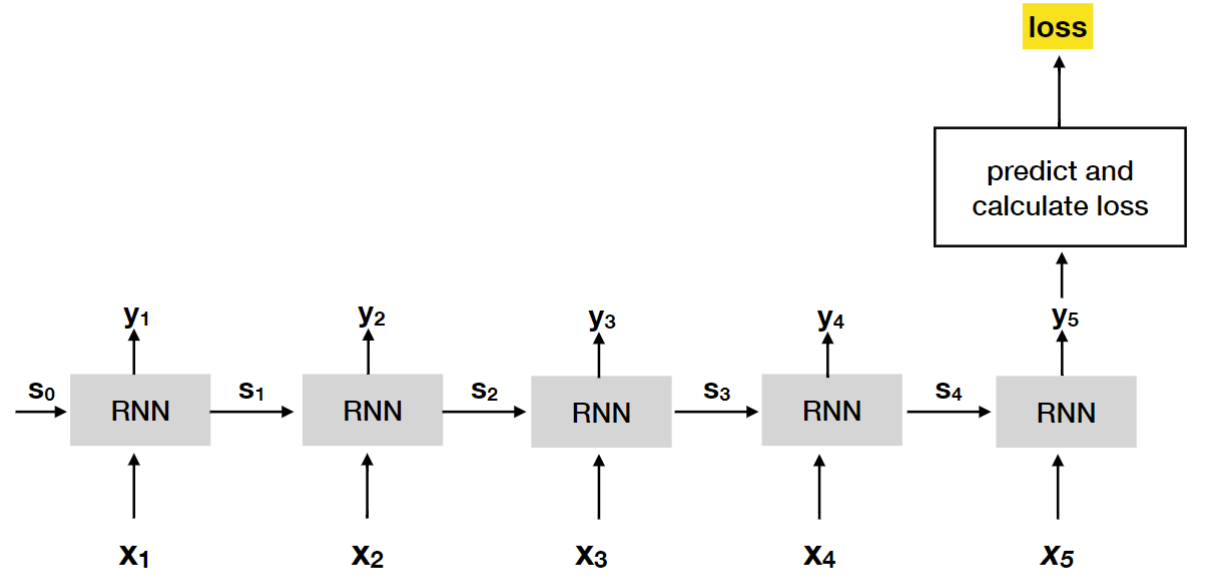

### Transducer
* One output for each input (time step)
* During training, loss for each time step is combined
* Examples: language modeling, POS tagging (output required for each input)

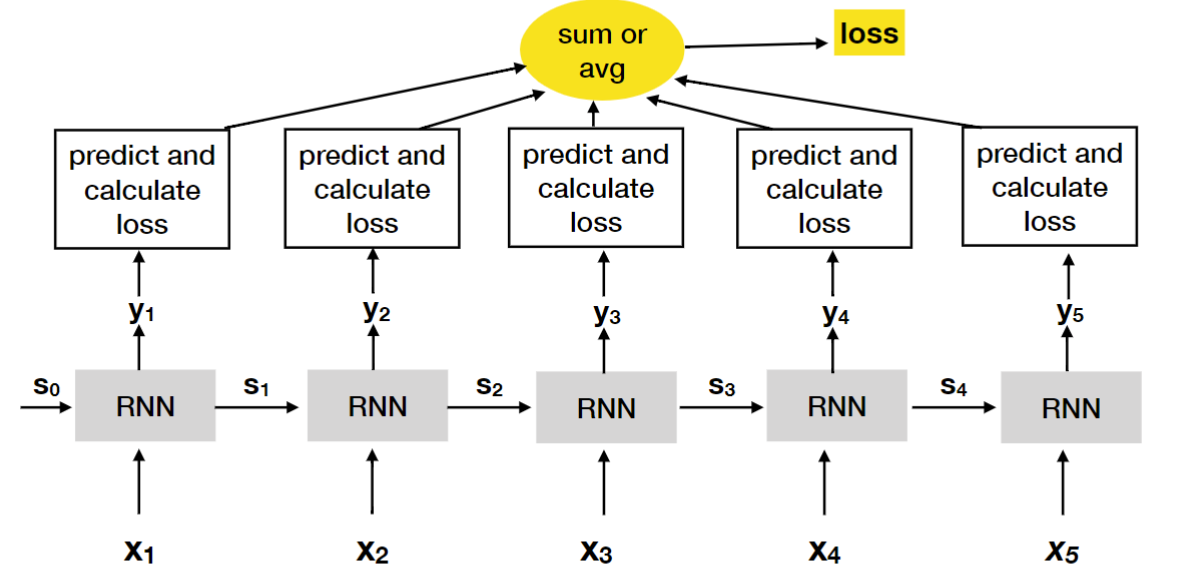

### RNN Language Model
* Using RNNs, we can get rid of the Markov assumption and directly compute the probability of a label given the entire history $P(w_i | w_1, ..., w_{i - 1})$ (rather than conditioning on the previous step)

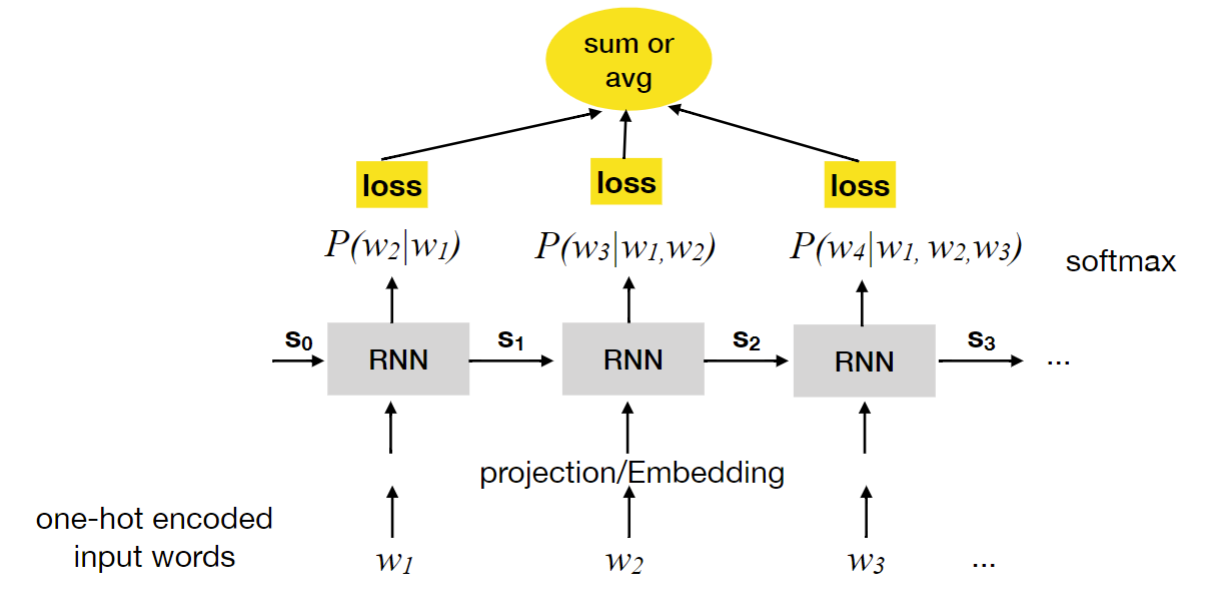


* To compute the probability of a sequence/sentence, combine all the probabilities of $w_1, ..., w_n$ by multiplying

### Generator
* Transducer used for Generation: (instead of computing the probability of a sequence, generate a sequence by sampling and finding the words with the highest probability) 
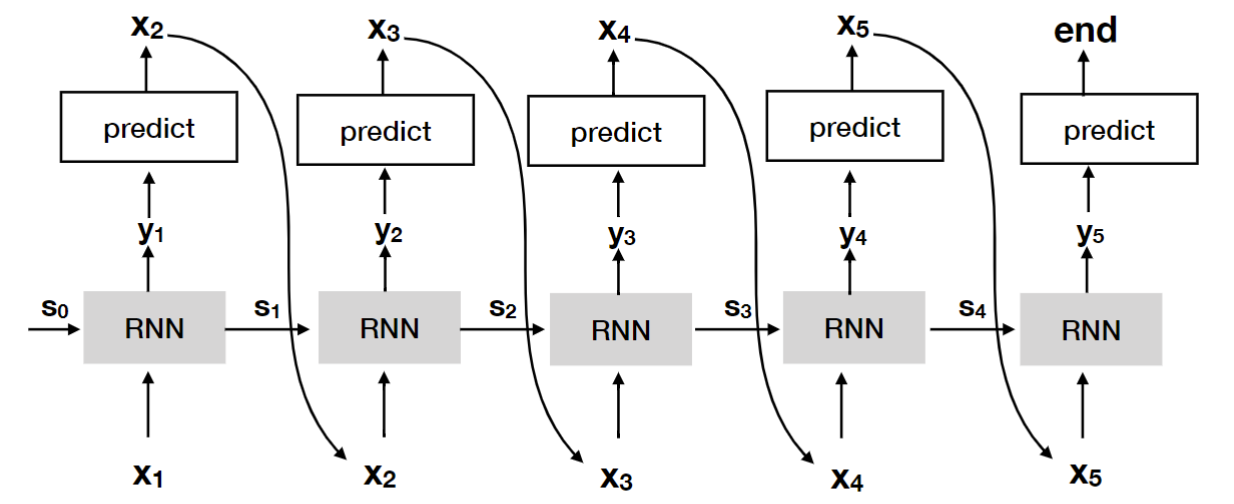


* Applications: language generation, MT
* Typically trained like a regular transducer on the target output in each step 

### Bi-directional RNN (biRNN)
* Regular RNN computes the output as a function of the left input context: $y_i = RNN(x_1, ..., x_i)$

* biRNN computes two hidden states for each input, by looking at the left input context and the right input context
$$y_i = RNN_f(x_1, ..., x_i); RNN_b (x_n, ..., x_i) $$

### Unsupervised Pre-Training
* Most NLP tasks depend on annotated training data, which is scarce and expensive to create
* Idea: train a model on some unsupervised task (ex. language modeling) on large amounts of data, and then **transfer** the model parameters to another task
* In NLP, specifically, transfer the component that computes dense representations of text (words or sentences)
* Pre-trained model parameters may be **fine-tuned** on specific supervised tasks

### ELMo (Embeddings from Language Models)
* Use ELMo to create word embeddings that represent both a word an its surrounding context
* Conventional pre-trained embeddings (word2vec) do not take context into account -- however, RNN can encode contexts of arbitrary length
* Idea: pre-train a stacked biRNN language model
    * Compute word representations as a combination of the stacked layer outputs
* For some NLP task:
    * Apply pre-trained biRNN to input to obtain ELMo representations
    * Concatenate ELMo representation with regular input vector

### ELMo Representations
* For each input token $k$, each biRNN layer $j$ outputs a representation
* A representation for the token $k$ based on the tokens to the left is output, and combined with a representation for the token $k$ based on the tokens to the right (bidirectional)
* Bidirectional token representation is created and used

### Applying ELMo to NLP Applications
* Assume the input to many NLP applications is a sentence $t_1, ..., t_n$ and the model uses some task specific projection $x_1, ..., x_n$
* Run biRNN over the input to obtain:
$$ ELMo_1, ..., ELMo_n
$$
* Then, use ELMo representations in the model 